In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
from torchvision.transforms import ToPILImage

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.autograd import Variable

# Định nghĩa generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.fc = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, output_dim)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.fc(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.tanh(x)
        return x

# Định nghĩa discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.fc = nn.Linear(input_dim, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x

# Hàm huấn luyện mô hình
def train(generator, discriminator, dataloader, num_epochs, batch_size, input_dim, device):
    generator = generator.to(device)
    discriminator = discriminator.to(device)
    loss = nn.BCELoss()
    optimizer_G = optim.Adam(generator.parameters(), lr=0.0002)
    optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002)

    for epoch in range(num_epochs):
        for i, (real_images, _) in enumerate(dataloader):
            real_images = real_images.view(-1, input_dim).to(device)
            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)

            # Huấn luyện discriminator với ảnh thật
            discriminator.zero_grad()
            real_outputs = discriminator(real_images)
            d_loss_real = loss(real_outputs, real_labels)
            d_loss_real.backward()

            # Huấn luyện discriminator với ảnh giả
            z = torch.randn(batch_size, input_dim).to(device)
            fake_images = generator(z)
            fake_outputs = discriminator(fake_images.detach())
            d_loss_fake = loss(fake_outputs, fake_labels)
            d_loss_fake.backward()
            optimizer_D.step()

            # Huấn luyện generator
            generator.zero_grad()
            outputs = discriminator(fake_images)
            g_loss = loss(outputs, real_labels)
            g_loss.backward()
            optimizer_G.step()

            if (i+1) % 200 == 0:
                print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(dataloader)}], d_loss: {d_loss_real.item()+d_loss_fake.item()}, g_loss: {g_loss.item()}")

# Cấu hình các thông số
input_dim = 784
output_dim = 784
batch_size = 100
num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Chuẩn bị dữ liệu Fashion-MNIST
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
train_dataset = datasets.FashionMNIST(root='./data', train=True, transform=transform, download=True)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Xây dựng và huấn luyện mô hình GAN
generator = Generator(input_dim, output_dim)
discriminator = Discriminator(input_dim)
train(generator, discriminator, train_dataloader, num_epochs, batch_size, input_dim, device)

100%|██████████| 26421880/26421880 [00:02<00:00, 11000447.08it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 178121.62it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3215709.52it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 22800714.88it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch [1/10], Step [200/600], d_loss: 0.21127899736166, g_loss: 2.4214887619018555
Epoch [1/10], Step [400/600], d_loss: 0.49775850772857666, g_loss: 1.2952743768692017
Epoch [1/10], Step [600/600], d_loss: 0.5284997522830963, g_loss: 1.1922413110733032
Epoch [2/10], Step [200/600], d_loss: 0.43640846014022827, g_loss: 1.4378881454467773
Epoch [2/10], Step [400/600], d_loss: 0.38501859456300735, g_loss: 1.6061828136444092
Epoch [2/10], Step [600/600], d_loss: 0.27139126509428024, g_loss: 2.5691888332366943
Epoch [3/10], Step [200/600], d_loss: 0.42427289485931396, g_loss: 2.033710479736328
Epoch [3/10], Step [400/600], d_loss: 0.26034969091415405, g_loss: 2.4984309673309326
Epoch [3/10], Step [600/600], d_loss: 0.24172648042440414, g_loss: 2.4438693523406982
Epoch [4/10], Step [200/600], d_loss: 0.4131094068288803, g_loss: 2.171849012374878
Epoch [4/10], Step [400/600], d_loss: 0.2833286374807358, 

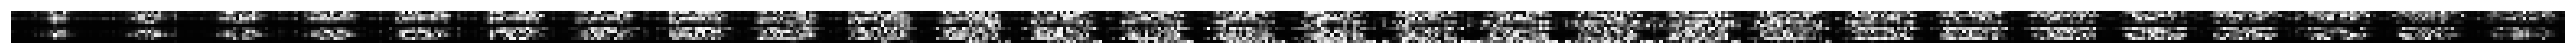

In [ ]:
generator.eval()

# Tạo ảnh mới
with torch.no_grad():
    z = torch.randn(10, input_dim).to(device)  # Tạo tensor ngẫu nhiên
    generated_images = generator(z)

# Chuyển tensor thành hình ảnh
#image_grid = make_grid(generated_images.cpu(), nrow=1)
image = ToPILImage()#(image_grid)

# Hiển thị hình ảnh
plt.figure(figsize=(30, 30), dpi=1000)
plt.imshow(image)
plt.axis('off')
plt.show()